<a href="https://colab.research.google.com/github/mantrala1/DataScienceprojects/blob/master/CNN_Plant_seedlings_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# **PLANT SEEDLING CLASSIFICATION**



### **Importing the libraries**

In [ ]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the images file.

fname= "/content/drive/MyDrive/Colab Notebooks/plant_seedlings/images.npy"
mydf = np.load(fname)

In [ ]:
# Import the label file
lname = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/plant_seedlings/Labels.csv')

In [ ]:
# Find the shape of images arrau
mydf.shape

(4750, 128, 128, 3)

In [ ]:
# Look at the shape of labels.
lname.shape

(4750, 1)

In [ ]:
lname.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [ ]:
# Convert the images numpy array to list;
mylst = mydf.tolist()

In [ ]:
# View  the first 10  labels
lname.head(10)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


In [ ]:
# Look at the distribution of labels
lname.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

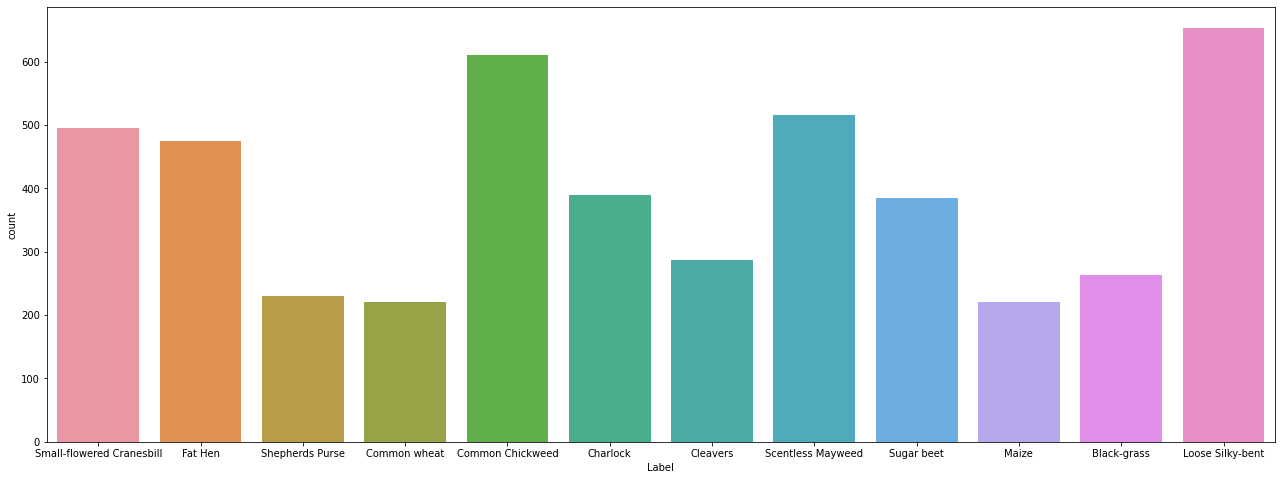

In [ ]:
plt.figure(figsize=(22,8))
sns.countplot(x="Label", data=lname)
#lname.info()

# Loose Silky-bent and Common Chickweed are the most frequent plants

In [ ]:
# Create a numerical Label_Identifier, convert the label text to number 

distinct_labels = pd.DataFrame(lname.value_counts()).reset_index().reset_index().rename(columns={ "index":"Label_id"})
distinct_labels = distinct_labels[['Label_id','Label']]

In [ ]:
distinct_labels

,Label_id,Label
0,0,Loose Silky-bent
1,1,Common Chickweed
2,2,Scentless Mayweed
3,3,Small-flowered Cranesbill
4,4,Fat Hen
5,5,Charlock
6,6,Sugar beet
7,7,Cleavers
8,8,Black-grass
9,9,Shepherds Purse


In [ ]:
# Map the label numbers to label names.
lname = lname.merge(distinct_labels, on="Label")
lvalue_lst = lname['Label_id'].tolist()
lname_lst = lname['Label'].tolist()

**CONVERT IMAGES TO GRAYSCALE**
  #STORE GRAY IMAGES, LABEL VALUES, ACTUAL IMAGES TOGETHER IN A CONCATENATED LIST

In [ ]:
# Create a list graylist containing just images
# Create a list images_labels containing gray images , the corresponding labels, and the original images

graylist=[]
images_labels=[]
for x in range(len(mydf)) :
  grayimg = cv2.cvtColor(mydf[x], cv2.COLOR_BGR2GRAY)
  newimg = cv2.resize(grayimg,(150,150))
  lvalue=lvalue_lst[x]
  labelname = lname_lst[x]
  graylist.append(newimg)
  images_labels.append([np.array(newimg), lvalue, np.array(mydf[x]), labelname ])
     

In [ ]:
images_labels_df = pd.DataFrame(images_labels)

In [ ]:
images_labels_df.iloc[0]

0    [[58, 56, 53, 56, 66, 73, 76, 83, 79, 71, 60, ...
1                                                    3
2    [[[35, 52, 78], [36, 49, 76], [31, 45, 69], [4...
3                            Small-flowered Cranesbill
Name: 0, dtype: object

#### **Exploratory Data Analysis**

Label_value=0
Label_ID=Loose Silky-bent
Actual_Image


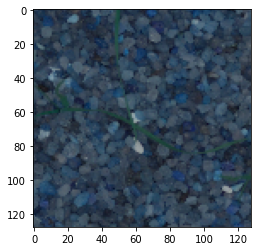

Gray_Image


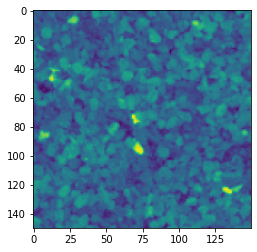

Label_value=1
Label_ID=Common Chickweed
Actual_Image


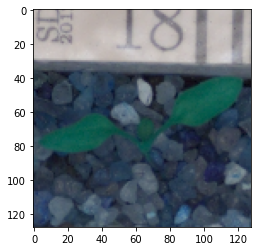

Gray_Image


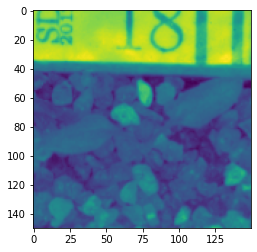

Label_value=2
Label_ID=Scentless Mayweed
Actual_Image


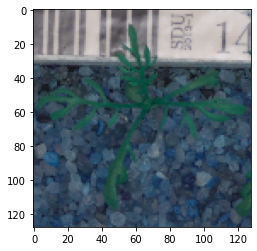

Gray_Image


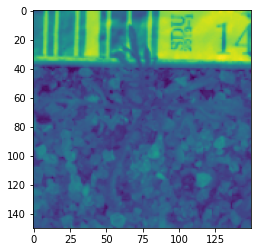

Label_value=3
Label_ID=Small-flowered Cranesbill
Actual_Image


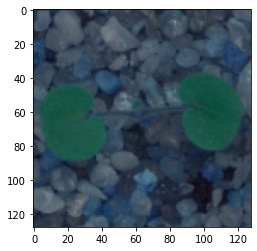

Gray_Image


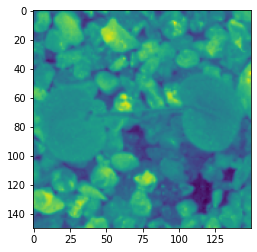

Label_value=4
Label_ID=Fat Hen
Actual_Image


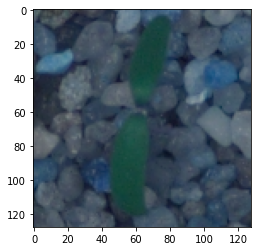

Gray_Image


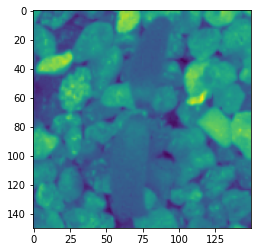

Label_value=5
Label_ID=Charlock
Actual_Image


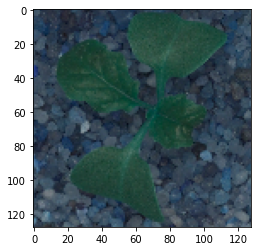

Gray_Image


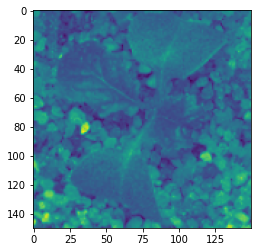

Label_value=6
Label_ID=Sugar beet
Actual_Image


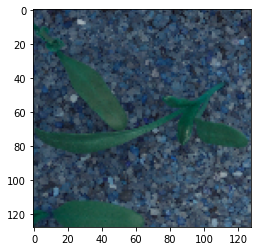

Gray_Image


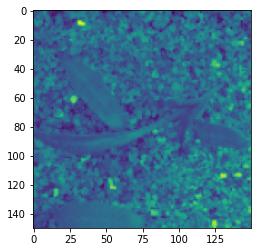

Label_value=7
Label_ID=Cleavers
Actual_Image


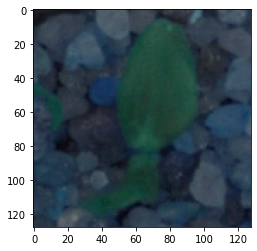

Gray_Image


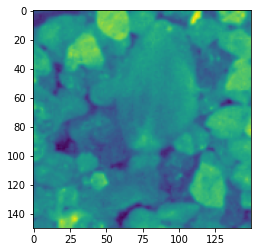

Label_value=8
Label_ID=Black-grass
Actual_Image


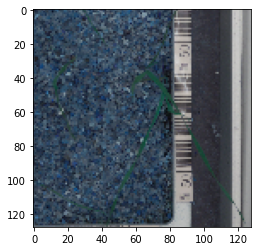

Gray_Image


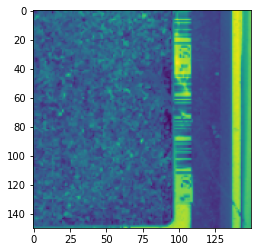

Label_value=9
Label_ID=Shepherds Purse
Actual_Image


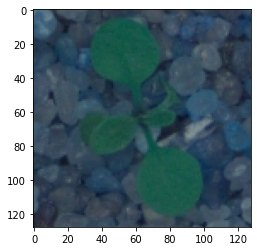

Gray_Image


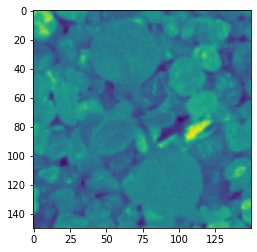

Label_value=10
Label_ID=Common wheat
Actual_Image


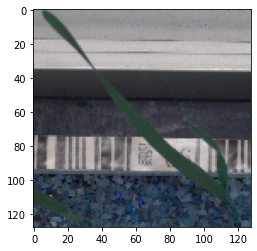

Gray_Image


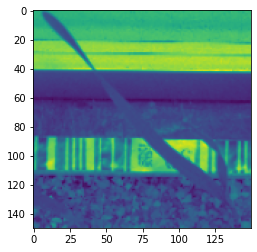

Label_value=11
Label_ID=Maize
Actual_Image


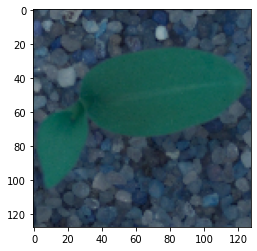

Gray_Image


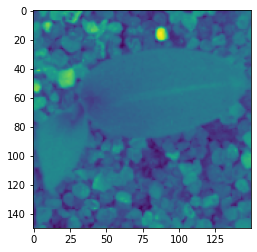

In [ ]:
# Print the first  actual and grayscale image for each classifier
for cat in range(12):
  imglist_tmp = images_labels_df[images_labels_df[1]==cat]
  imglist =imglist_tmp.iloc[0]
 

  print("Label_value=" + str(imglist[1]) )
  print("Label_ID=" + str(imglist[3]))
  print("Actual_Image")
  plt.imshow(imglist[2])
  imglist[2].shape
  plt.show()

  print("Gray_Image")
  plt.imshow(imglist[0])
  imglist[0].shape
  plt.show()

**Finding the mean images** for each class of plant: 



(654,)


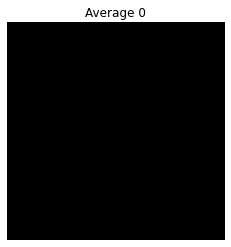

(611,)


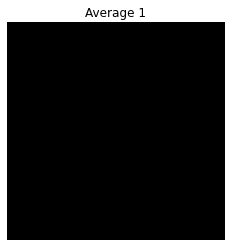

(516,)


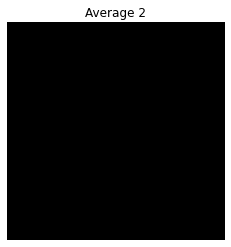

(496,)


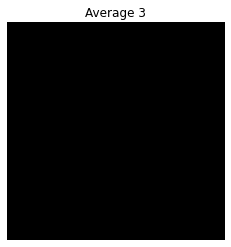

(475,)


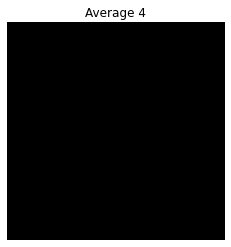

(390,)


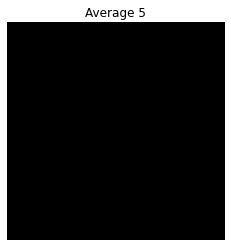

(385,)


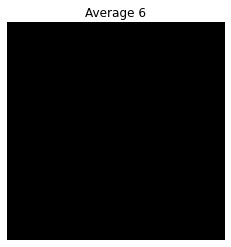

(287,)


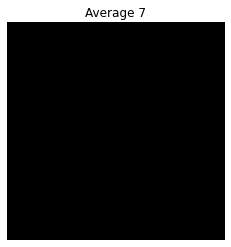

(263,)


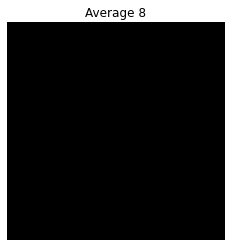

(231,)


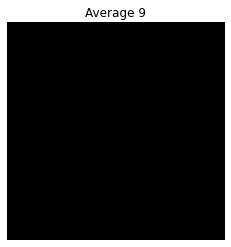

(221,)


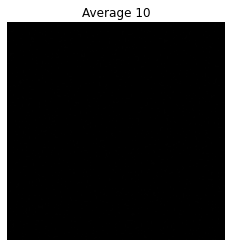

(221,)


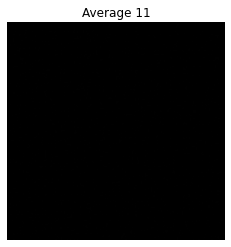

In [ ]:
# The mean images are dark because the values with in array are between 0 and 1 indicating black.

def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((150,150))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img


for cat in range(12):
  imglist = images_labels_df[images_labels_df[1]==cat]
  print(imglist[0].shape)
  imgarray = imglist[0]
  find_mean_img(imgarray,cat)  

### **Data Preprocessing** 

**APPLY GAUSSIAN BLURRING**

In [ ]:
 #Now we apply the gaussian blur to each 150 x 150 pixels array (image) to reduce the noise in the image
blurlist=[]
for idx in range(len(graylist)):
  blurlist.append(cv2.GaussianBlur(graylist[idx], (5, 5), 0) )


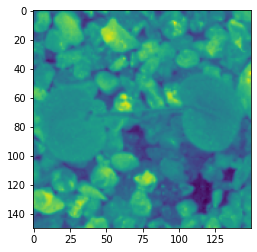

In [ ]:
# Look at the first gray scale image
plt.imshow(graylist[0])

4750

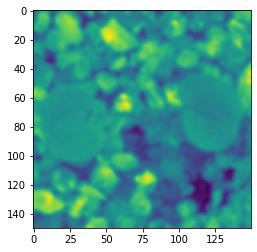

In [ ]:
# Look at the blurred image
plt.imshow(blurlist[0])
len(blurlist)

**TRAIN - TEST SPLIT OF IMAGES**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(blurlist, lvalue_lst, test_size=0.2, random_state=1, stratify=lname)

In [ ]:
(X_train[0]).shape

(150, 150)

**DATA NORMALIZATION:**

In [ ]:
X_train= np.array(X_train)
# Normalizing pixel values  
X_train = X_train/255.0  
# image reshaping 
X_train = X_train.reshape(-1,150,150,1)

In [ ]:
X_test = np.array(X_test)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)

### **One-Hot Encoding**

In [ ]:
encoded = to_categorical(np.array(y_train))
y_train_e=encoded
encoded_test = to_categorical(np.array(y_test))
y_test_e=encoded_test

In [ ]:
encoded_test[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(y_train_e.shape)
print(y_test_e.shape)

(3800, 12)
(950, 12)


### **Model Building** 



#### **Convolutional Neural Network (CNN)**



In [ ]:
# Model 1 : 2 Conv layers, 1 flatten, and 2 dense layers . with soft max ,and ADAM optimizer

In [ ]:
from tensorflow.keras.layers import Conv2D

model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(150, 150, 1)))
model1.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(12, activation="softmax"))

In [ ]:
# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
history1=model1.fit( x=X_train, y=y_train_e, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
84/84 [==============================] - 3s 35ms/step - loss: 2.4266 - accuracy: 0.1252 - val_loss: 2.4124 - val_accuracy: 0.1614
Epoch 2/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4238 - accuracy: 0.1124 - val_loss: 2.4133 - val_accuracy: 0.1316
Epoch 3/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4256 - accuracy: 0.1214 - val_loss: 2.4153 - val_accuracy: 0.1316
Epoch 4/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4258 - accuracy: 0.1192 - val_loss: 2.4068 - val_accuracy: 0.1316
Epoch 5/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4240 - accuracy: 0.1233 - val_loss: 2.4057 - val_accuracy: 0.1614
Epoch 6/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4246 - accuracy: 0.1372 - val_loss: 2.4061 - val_accuracy: 0.1316
Epoch 7/10
84/84 [==============================] - 3s 32ms/step - loss: 2.4257 - accuracy: 0.1267 - val_loss: 2.4115 - val_accuracy: 0.1614
Epoch 8/10
84

In [ ]:
model1.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 11ms/step - loss: 2.4215 - accuracy: 0.1379


[2.4215073585510254, 0.13789473474025726]

# MODEL 1 : CONFUSION MATRIX

In [ ]:
# Test Prediction 
y_test_pred_1 = model1.predict(X_test)
y_test_pred_classes_1 = np.argmax(y_test_pred_1, axis=1)
y_test_pred_prob_1 = np.max(y_test_pred_1, axis=1)



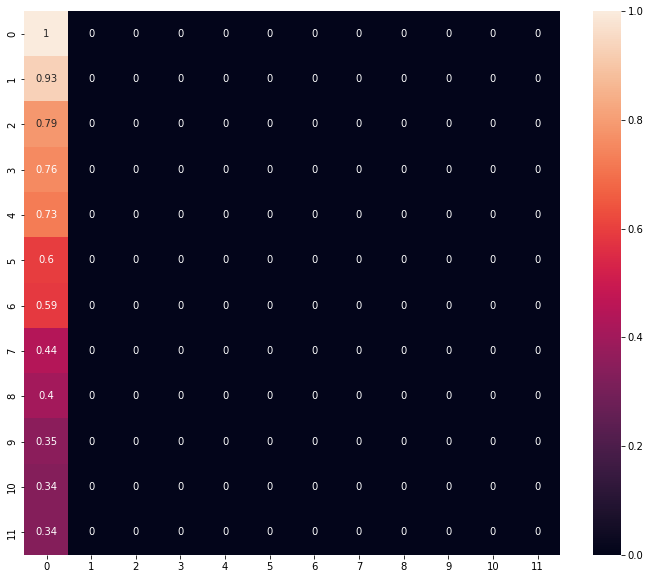

In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test), y_test_pred_classes_1)

cf_matrix = confusion_matrix(np.array(y_test), y_test_pred_classes_1)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(cf_matrix_n1, xticklabels=distinct_labels['Label_id'], yticklabels=distinct_labels['Label_id'], annot=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


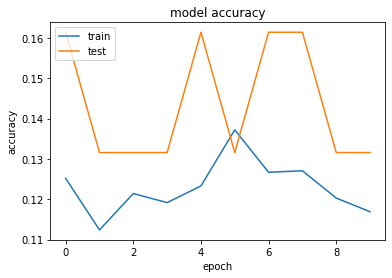

In [ ]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 1 performs poor on the training dataset and the test dataset.

In [ ]:
# Model 2:
#CNN + POOLING + DROPOUT

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model

model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(150, 150, 1)))
model2.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.2))
model2.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model2.add(Dense(128, activation="relu"))
#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model2.add(Dense(12, activation="softmax"))

In [ ]:
# Compile the model
import tensorflow

model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)
# Fit the model
history2=model2.fit(x=X_train, y=y_train_e, batch_size=32, epochs=30, validation_data=(X_test, y_test_e), callbacks=[callback])

Epoch 1/30
119/119 [==============================] - 3s 23ms/step - loss: 2.4320 - accuracy: 0.1305 - val_loss: 2.4475 - val_accuracy: 0.1284
Epoch 2/30
119/119 [==============================] - 2s 21ms/step - loss: 2.4226 - accuracy: 0.1347 - val_loss: 2.4159 - val_accuracy: 0.1379
Epoch 3/30
119/119 [==============================] - 2s 21ms/step - loss: 2.4205 - accuracy: 0.1358 - val_loss: 2.4266 - val_accuracy: 0.1379


In [ ]:
model2.evaluate(X_test, y_test_e)

30/30 [==============================] - 0s 8ms/step - loss: 2.4208 - accuracy: 0.1379


[2.420792579650879, 0.13789473474025726]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


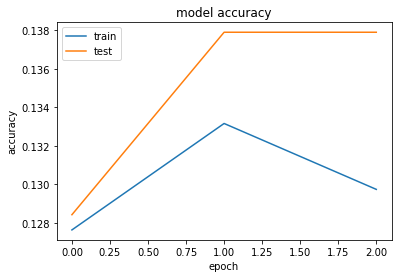

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2 performance is better compared to model1.


**Model 3:  With Dropout and Padding ** **bold text**

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model3 = Sequential()
#
y_train_e=np.array(y_train_e)
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,1)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))
#
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))
#
model3.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#
model3.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

# 
model3.add(Flatten())
model3.add(Dense(1024, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history3=model3.fit(X_train, 
          y_train_e,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=3, 
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)
#number of samples per gradient update for training  



Epoch 1/3
47/48 [============================>.] - ETA: 0s - loss: 2.4397 - accuracy: 0.1243
Epoch 1: val_accuracy improved from -inf to 0.16842, saving model to best_model.h5
48/48 [==============================] - 4s 70ms/step - loss: 2.4391 - accuracy: 0.1240 - val_loss: 2.4023 - val_accuracy: 0.1684
Epoch 2/3
47/48 [============================>.] - ETA: 0s - loss: 2.4274 - accuracy: 0.1330
Epoch 2: val_accuracy did not improve from 0.16842
48/48 [==============================] - 3s 61ms/step - loss: 2.4283 - accuracy: 0.1322 - val_loss: 2.4149 - val_accuracy: 0.1684
Epoch 3/3
47/48 [============================>.] - ETA: 0s - loss: 2.4274 - accuracy: 0.1350
Epoch 3: val_accuracy did not improve from 0.16842
48/48 [==============================] - 3s 60ms/step - loss: 2.4280 - accuracy: 0.1345 - val_loss: 2.4012 - val_accuracy: 0.1408


In [ ]:
model3.evaluate(X_test,np.array(y_test_e))

30/30 [==============================] - 0s 11ms/step - loss: 2.4181 - accuracy: 0.1284


[2.4181408882141113, 0.12842105329036713]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


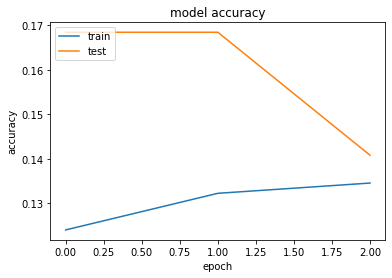

In [ ]:
print(history3.history.keys())
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Conclusion**

Of the 3 models, Model 3 has the better test accuracy score
